# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work
### (5 Marks)

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


## Part 1: Printing to the Console
### (6 Marks)

In [81]:
!git config --global user.email "moseskimiji@gmail.com"
!git config --global user.name "kimijimoses"

In [82]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# In the space below, please print "Hello, World! Welcome to the Student Gradebook Management System."
# (1 mark)
print("Hello, World! Welcome to the Student Gradebook Management System.")

Hello, World! Welcome to the Student Gradebook Management System.


In [84]:
# Fill in your information using the defined variables below:
# (1 mark)
lab_group_number = 41
intake_year = 2024
intake_semester = "Fall" #"Fall" or "Winter"

# Using f-strings and the variables above, print "This is implemented by Group <lab_group_number>, for ENGG680 <intake_semester> of <intake_year>"
# (2 marks)
print(f"This is implemented by Group {lab_group_number} for ENGG680 {intake_semester} of {intake_year}")

This is implemented by Group 41 for ENGG680 Fall of 2024


In [85]:
# Use indexing to print "The subjects involved in this grading system is English and Math." using "subjects" below.
# (2 marks)
subjects = ("English", "Math")
print(f"The subjects involved in this grading system is {subjects[0]} and {subjects[1]}")

The subjects involved in this grading system is English and Math


## Part 2: Using Pandas for Data Management and Analytics
### (20 marks)

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
%cd /content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment_1

/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment_1


In [88]:
# In the space below, please import the Pandas library
# (1 mark)
import pandas as pd

In [89]:
# Load the student grade CSV files into DataFrames using the defined variables
# (2 marks)

# Create file paths for math and englih students grade csv files
students_english_grades_file_path = "studentGrades_English.csv"
students_math_grades_file_path = "studentGrades_Math.csv"
students_home_room_file_path = "studentHomerooms.csv"

df_english =pd.read_csv(students_english_grades_file_path)
df_math =pd.read_csv(students_math_grades_file_path)

print(df_english)

   firstName  lastName  studentID  grade
0       Emma     Smith      10959     95
1     Sophia  Robinson      75175     88
2       Emma    Taylor      42257     87
3      David  Robinson      55148     86
4    Stephen     Curry      30303     90
5   Isabella  Thompson      72824     88
6    Jasmine     Smith      70385     84
7      James     Jones      87707     76
8      Sarah     Swift      61026     80
9       Anne     Clark      90449     82
10      Ryan    Thomas      62137     92
11    Daniel     White      25477     91
12      Sara       Doe      47991     98
13   Matthew     White      25376     80


In [90]:
# Merging the DataFrames on 'studentID'
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [91]:
# Take a look at the data contained in the csv files. Why is studentID chosen as the key?
# (1 mark)
print(df_studentGrades)

   firstName_English lastName_English  studentID  grade_English  \
0               Emma            Smith      10959             95   
1             Sophia         Robinson      75175             88   
2               Emma           Taylor      42257             87   
3              David         Robinson      55148             86   
4            Stephen            Curry      30303             90   
5           Isabella         Thompson      72824             88   
6            Jasmine            Smith      70385             84   
7              James            Jones      87707             76   
8              Sarah            Swift      61026             80   
9               Anne            Clark      90449             82   
10              Ryan           Thomas      62137             92   
11            Daniel            White      25477             91   
12              Sara              Doe      47991             98   
13           Matthew            White      25376             8

In [92]:
# Let's calculate the average GPA across the two classes for each student
df_studentGrades['GPA'] = df_studentGrades[['grade_English', 'grade_Math']].mean(axis=1)

# Now let's check the data! In the space below, please use the .head method to display the dataframe.
# (1 mark)
df_studentGrades = df_studentGrades.head(10)
print(df_studentGrades)

  firstName_English lastName_English  studentID  grade_English firstName_Math  \
0              Emma            Smith      10959             95           Emma   
1            Sophia         Robinson      75175             88         Sophia   
2              Emma           Taylor      42257             87           Emma   
3             David         Robinson      55148             86          David   
4           Stephen            Curry      30303             90        Stephen   
5          Isabella         Thompson      72824             88       Isabella   
6           Jasmine            Smith      70385             84        Jasmine   
7             James            Jones      87707             76          James   
8             Sarah            Swift      61026             80          Sarah   
9              Anne            Clark      90449             82           Anne   

  lastName_Math  grade_Math   GPA  
0         Smith          90  92.5  
1      Robinson          95  91.5  


In [93]:
# Do you notice a problem? The rows for first name and last name have been duplicated!
# .drop(columns=['<column_name1>','<column_name2>'] is a Pandas method that can be used to drop columns.
# In the space below, drop the first name and last name associated with the math .csv file.
# (2 mark)
df_studentGrades = df_studentGrades.drop(columns=['firstName_Math','lastName_Math'])
print(df_studentGrades)

  firstName_English lastName_English  studentID  grade_English  grade_Math  \
0              Emma            Smith      10959             95          90   
1            Sophia         Robinson      75175             88          95   
2              Emma           Taylor      42257             87          85   
3             David         Robinson      55148             86          87   
4           Stephen            Curry      30303             90          88   
5          Isabella         Thompson      72824             88          79   
6           Jasmine            Smith      70385             84          80   
7             James            Jones      87707             76          92   
8             Sarah            Swift      61026             80          98   
9              Anne            Clark      90449             82          99   

    GPA  
0  92.5  
1  91.5  
2  86.0  
3  86.5  
4  89.0  
5  83.5  
6  82.0  
7  84.0  
8  89.0  
9  90.5  


In [94]:
# Let's display the data again. Use an appropriate method (hint: already used before)
# (1 mark)
print(df_studentGrades.head(10))

  firstName_English lastName_English  studentID  grade_English  grade_Math  \
0              Emma            Smith      10959             95          90   
1            Sophia         Robinson      75175             88          95   
2              Emma           Taylor      42257             87          85   
3             David         Robinson      55148             86          87   
4           Stephen            Curry      30303             90          88   
5          Isabella         Thompson      72824             88          79   
6           Jasmine            Smith      70385             84          80   
7             James            Jones      87707             76          92   
8             Sarah            Swift      61026             80          98   
9              Anne            Clark      90449             82          99   

    GPA  
0  92.5  
1  91.5  
2  86.0  
3  86.5  
4  89.0  
5  83.5  
6  82.0  
7  84.0  
8  89.0  
9  90.5  


In [95]:
# Let's also rename the first and last names appropriately.
# Complete the code in the space below by replacing "<>" with the proper column name
# (1 mark)

df_studentGrades = df_studentGrades.rename(columns={
    'firstName_English': 'firstName',
    'lastName_English': 'lastName',
    'grade_English': 'englishGrade',
    'grade_Math': 'mathGrade'
    })
print(df_studentGrades)

  firstName  lastName  studentID  englishGrade  mathGrade   GPA
0      Emma     Smith      10959            95         90  92.5
1    Sophia  Robinson      75175            88         95  91.5
2      Emma    Taylor      42257            87         85  86.0
3     David  Robinson      55148            86         87  86.5
4   Stephen     Curry      30303            90         88  89.0
5  Isabella  Thompson      72824            88         79  83.5
6   Jasmine     Smith      70385            84         80  82.0
7     James     Jones      87707            76         92  84.0
8     Sarah     Swift      61026            80         98  89.0
9      Anne     Clark      90449            82         99  90.5


In [96]:
# Now let's find out some statistics about our student grades!
# Please use an appropriate Pandas method in the space below to display statistical values like
# mean, standard deviation, min, max, and others.
# (1 mark)
student_grades_stats = df_studentGrades.describe()
print(student_grades_stats)

         studentID  englishGrade  mathGrade       GPA
count     10.00000     10.000000  10.000000  10.00000
mean   59623.30000     85.600000  89.300000  87.45000
std    25434.71898      5.378971   6.896859   3.59359
min    10959.00000     76.000000  79.000000  82.00000
25%    45479.75000     82.500000  85.500000  84.50000
50%    65705.50000     86.500000  89.000000  87.75000
75%    74587.25000     88.000000  94.250000  90.12500
max    90449.00000     95.000000  99.000000  92.50000


In [97]:
# Do you notice a problem?
# Some statistics are not relevant. The average of studentIDs have no meaning in reality!
# Let's typecast each column appropriately so as to only get meaningful statistics.
# In the code below, replace '<>' by choosing between 'str' for string or 'float' for float
# to properly typecast each column.
# (3 marks)

df_studentGrades['studentID'] = df_studentGrades['studentID'].astype("str")
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype("str")
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype("str")
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype("float")
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype("float")
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype("float")
print(df_studentGrades)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
0      Emma     Smith     10959          95.0       90.0  92.5
1    Sophia  Robinson     75175          88.0       95.0  91.5
2      Emma    Taylor     42257          87.0       85.0  86.0
3     David  Robinson     55148          86.0       87.0  86.5
4   Stephen     Curry     30303          90.0       88.0  89.0
5  Isabella  Thompson     72824          88.0       79.0  83.5
6   Jasmine     Smith     70385          84.0       80.0  82.0
7     James     Jones     87707          76.0       92.0  84.0
8     Sarah     Swift     61026          80.0       98.0  89.0
9      Anne     Clark     90449          82.0       99.0  90.5


In [98]:
# Now let's see our statistics!
df_studentGrades.describe()

,englishGrade,mathGrade,GPA
count,10.000000,10.000000,10.00000
mean,85.600000,89.300000,87.45000
std,5.378971,6.896859,3.59359
min,76.000000,79.000000,82.00000
25%,82.500000,85.500000,84.50000
50%,86.500000,89.000000,87.75000
75%,88.000000,94.250000,90.12500
max,95.000000,99.000000,92.50000


In [99]:
# Now sort the merged dataframe so that it is in descending order based on GPA, and print it
# (1 mark)
df_studentsGPASorted = df_studentGrades.sort_values(by ="GPA",ascending= False)
print(df_studentsGPASorted)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
0      Emma     Smith     10959          95.0       90.0  92.5
1    Sophia  Robinson     75175          88.0       95.0  91.5
9      Anne     Clark     90449          82.0       99.0  90.5
4   Stephen     Curry     30303          90.0       88.0  89.0
8     Sarah     Swift     61026          80.0       98.0  89.0
3     David  Robinson     55148          86.0       87.0  86.5
2      Emma    Taylor     42257          87.0       85.0  86.0
7     James     Jones     87707          76.0       92.0  84.0
5  Isabella  Thompson     72824          88.0       79.0  83.5
6   Jasmine     Smith     70385          84.0       80.0  82.0


In [100]:
# If we wanted to access the student with the highest gpa based on df_studentsGPASorted,
# does .iloc or .loc make more sense and why?
# (2 marks)

# ANSWER: Using .iloc makes more sense because the table is already arranged in descending order of magnitude
# which makes the student with highst GPA to be in the first row in the sorted table.
# This makes accessing the data easy and faster because we already know the positional indices of the data we are looking for.
# Unlike the .loc method that we have to specify row and type out the columns to look at, it takes more time and increases the changes of having typographical errors.

In [101]:
# Now using the method you specified, assign the variable below to the row containing the student with the highest GPA
# (1 mark)
top_student = df_studentsGPASorted.iloc[[0],[0,1,2,3,4,5]]
print(top_student)

  firstName lastName studentID  englishGrade  mathGrade   GPA
0      Emma    Smith     10959          95.0       90.0  92.5


In [102]:
# Now print the student first name and last name with the highest GPA in this format:
# "The student with the highest GPA is <firstName> <lastName> with a GPA of <GPA>"
# (1 mark)
top_student_values = top_student.values
print(f"The student with the highest GPA is {top_student_values[0][0]} {top_student_values[0][1]} with a GPA of {top_student_values[0][5]}")

The student with the highest GPA is Emma Smith with a GPA of 92.5


In [103]:
# We can use logical expressions to filter and print data. For example, let's print the students with math grades higher than 90:
df_mathGrade_over90 = df_studentsGPASorted[df_studentsGPASorted['mathGrade'] > 90]
print(df_mathGrade_over90)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
1    Sophia  Robinson     75175          88.0       95.0  91.5
9      Anne     Clark     90449          82.0       99.0  90.5
8     Sarah     Swift     61026          80.0       98.0  89.0
7     James     Jones     87707          76.0       92.0  84.0


In [104]:
# Now print the students whos GPA are lower than 85
# (2 marks)
df_mathGrade_below85 = df_studentsGPASorted[df_studentsGPASorted['GPA'] < 85]
print(df_mathGrade_below85)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
7     James     Jones     87707          76.0       92.0  84.0
5  Isabella  Thompson     72824          88.0       79.0  83.5
6   Jasmine     Smith     70385          84.0       80.0  82.0


## Part 3: More Data Analytics using Pandas
### (20 marks)

In [105]:
# Select the column 'grade' from the original English grade dataset and print it
# (1 mark)
english_grade_column = df_english.grade
print(english_grade_column)

0     95
1     88
2     87
3     86
4     90
5     88
6     84
7     76
8     80
9     82
10    92
11    91
12    98
13    80
Name: grade, dtype: int64


In [106]:
# Select the column 'GPA' from the df_studentGrades and print it
# (1 mark)
studentGrades_GPA = df_studentGrades.GPA
print(studentGrades_GPA)

0    92.5
1    91.5
2    86.0
3    86.5
4    89.0
5    83.5
6    82.0
7    84.0
8    89.0
9    90.5
Name: GPA, dtype: float64


In [107]:
# What is the data type of grade from the English grade dataset?
# (0.5 mark)
# ANSWER: The data type of grade from the English grade dataset is Integer (int64)

# What is the data type of GPA from the merged dataset?
# (0.5 mark)
# ANSWER: The data type of GPA from the merged dataset is float (float64)

# Is it different? Why?
# (1 mark)
# ANSWER: Yes, they are different. The data type of "grade" from the original English grade dataset is an integer, while that of "GPA" from the merged dataset is a floating point data type (real numbers with decimal points). Pandas' .mean() method always return a floating point values

In [108]:
# Load the student homeroom CSV file into a DataFrame using the following variable name
# (1 mark)
df_homeroom = pd.read_csv(students_home_room_file_path)

df_homeroom = df_homeroom.head(10)
print(df_homeroom)
print(df_studentGrades)

  firstName  lastName  studentID  homeRoom
0      Emma     Smith      10959       313
1    Sophia  Robinson      75175       311
2      Emma    Taylor      42257       311
3     David  Robinson      55148       313
4   Stephen     Curry      30303       313
5  Isabella  Thompson      72824       311
6   Jasmine     Smith      70385       313
7     James     Jones      87707       313
8     Sarah     Swift      61026       311
9      Anne     Clark      90449       311
  firstName  lastName studentID  englishGrade  mathGrade   GPA
0      Emma     Smith     10959          95.0       90.0  92.5
1    Sophia  Robinson     75175          88.0       95.0  91.5
2      Emma    Taylor     42257          87.0       85.0  86.0
3     David  Robinson     55148          86.0       87.0  86.5
4   Stephen     Curry     30303          90.0       88.0  89.0
5  Isabella  Thompson     72824          88.0       79.0  83.5
6   Jasmine     Smith     70385          84.0       80.0  82.0
7     James     Jones  

In [109]:
# Merge the studentHomerooms with the merged dataset. Make sure that the key you are joining on are the same typecast for both datasets.
# Also ensure that there are no redundant columns, and finally display the first few rows.
# Hint: try joining on more than one column to avoid having to drop redundant columns, ie. on=['studentID', '<ColumnA>', '<ColumnB>'] ...
# (5 marks)
#

In [110]:
# The code below calculates the mean of each homeroom class.
df_homeroom['studentID'] = df_homeroom['studentID'].astype("str")

# Merge df_homeroom and df_studentGrades together
df_studentInfo = pd.merge(df_homeroom, df_studentGrades, on=['firstName','lastName','studentID'], suffixes=('_x', '_y'))
print(df_studentInfo)

# The code below calculates the mean of each homeroom class.
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()
print(df_grouped)

# Which homeroom has a higher GPA?
# (1 mark)
# ANSWER: The homeroom with higher GPA is "homeroom-313"


  firstName  lastName studentID  homeRoom  englishGrade  mathGrade   GPA
0      Emma     Smith     10959       313          95.0       90.0  92.5
1    Sophia  Robinson     75175       311          88.0       95.0  91.5
2      Emma    Taylor     42257       311          87.0       85.0  86.0
3     David  Robinson     55148       313          86.0       87.0  86.5
4   Stephen     Curry     30303       313          90.0       88.0  89.0
5  Isabella  Thompson     72824       311          88.0       79.0  83.5
6   Jasmine     Smith     70385       313          84.0       80.0  82.0
7     James     Jones     87707       313          76.0       92.0  84.0
8     Sarah     Swift     61026       311          80.0       98.0  89.0
9      Anne     Clark     90449       311          82.0       99.0  90.5
homeRoom
311    88.1
313    86.8
Name: GPA, dtype: float64


In [111]:
# Now let's work with multiple sorts. The .sort_values() method can sort by multiple columns, meaning you can specify a primary column and a secondary column for sorting.
# For example, by=['ColumnA', 'ColumnB'] will first sort by ColumnA and then by ColumnB.
# Create and print a DataFrame, df_studentsGPASorted_homeroom, which is sorted by homeRoom and then by GPA, both in descending order.
# (3 mark)
#
df_studentsGPASorted_homeroom = df_studentInfo.sort_values(by= ["homeRoom", "GPA"],ascending= [False,False])
print(df_studentsGPASorted_homeroom)

  firstName  lastName studentID  homeRoom  englishGrade  mathGrade   GPA
0      Emma     Smith     10959       313          95.0       90.0  92.5
4   Stephen     Curry     30303       313          90.0       88.0  89.0
3     David  Robinson     55148       313          86.0       87.0  86.5
7     James     Jones     87707       313          76.0       92.0  84.0
6   Jasmine     Smith     70385       313          84.0       80.0  82.0
1    Sophia  Robinson     75175       311          88.0       95.0  91.5
9      Anne     Clark     90449       311          82.0       99.0  90.5
8     Sarah     Swift     61026       311          80.0       98.0  89.0
2      Emma    Taylor     42257       311          87.0       85.0  86.0
5  Isabella  Thompson     72824       311          88.0       79.0  83.5


In [112]:
# Do you notice a problem with the indices? They are basically meaningless now that we have sorted by homeroom and GPA.

# The code below changes the index of the dataframe so that it is more intuitive.
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

print(df_studentsGPASorted_homeroom)

         firstName  lastName studentID  homeRoom  englishGrade  mathGrade  \
newIndex                                                                    
313-1         Emma     Smith     10959       313          95.0       90.0   
313-2      Stephen     Curry     30303       313          90.0       88.0   
313-3        David  Robinson     55148       313          86.0       87.0   
313-4        James     Jones     87707       313          76.0       92.0   
313-5      Jasmine     Smith     70385       313          84.0       80.0   
311-1       Sophia  Robinson     75175       311          88.0       95.0   
311-2         Anne     Clark     90449       311          82.0       99.0   
311-3        Sarah     Swift     61026       311          80.0       98.0   
311-4         Emma    Taylor     42257       311          87.0       85.0   
311-5     Isabella  Thompson     72824       311          88.0       79.0   

           GPA  
newIndex        
313-1     92.5  
313-2     89.0  
313-3  

In [113]:
# Describe what each coding line in the cell above is doing
# (4 marks)



#------------------First Line of Code Description -----------------------
# CODE: df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1

# Code Description: This line of code added a new column to the df_studentsGPASorted_homeroom data frame (table). The values in this column are determined by first grouping the unique values in homeRoom column into separate groups, then the chained .cumcount() method is called to perform a cumulative row count on each unique group starting from zero. The +1 increments the rank as the execution goes on.

#---------------Second Line of Code Description ----------------------------
# CODE: df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)

# Code Description: This line of code creates a new column called "newIndex" in the df_studentsGPASorted_homeroom DataFrame, converts the data type of "homeRoom" and "studentRank" columns into a string data type so that they can be concatenated together. The result of the concatenation of "homeRoom" and "studentRank" is assigned to the newly created "newIndex" in the df_studentsGPASorted_homeroom DataFrame.

#------------------- Third Line of Code Description ---------------------------
# CODE: df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')

# Code Description: This line of code sets the index value of the df_studentsGPASorted_homeroom DataFrame to be the values of the newly created "newIndex" column. This result of this modification is reassigned to the df_studentsGPASorted_homeroom

#------------------- Fourth Line of Code Description -------------------------
# CODE: df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

# Code Description: This line of code removes the "studentRank" column from the
# df_studentsGPASorted data frame using the DataFrame's .drop() method, the result of this operation, which is a modified df_studentsGPASorted_homeroom data frame without the "studentRank" column is reassigned to the df_studentsGPASorted_homeroom data frame (table).

In [114]:
# Given df_studentsGPASorted_homeroom, please find and print the students with the highest GPA in each homeroom using the .loc method.
# (2 marks)
#
# Step 1: Group by 'homeRoom' and find the index of the max GPA in each homeroom
maximum_GPA_indices = df_studentsGPASorted_homeroom.groupby('homeRoom')['GPA'].idxmax()

# Step 2: Use .loc[] to retrieve the students with the highest GPA in each homeroom
highest_GPA_student_Table = df_studentsGPASorted_homeroom.loc[maximum_GPA_indices]

# Step 3: Print the result
print(highest_GPA_student_Table)

         firstName  lastName studentID  homeRoom  englishGrade  mathGrade  \
newIndex                                                                    
311-1       Sophia  Robinson     75175       311          88.0       95.0   
313-1         Emma     Smith     10959       313          95.0       90.0   

           GPA  
newIndex        
311-1     91.5  
313-1     92.5  


## Part 4: Using Matplotlib for Data Analytics
### (14 marks)

In [115]:
# In the space below, please import the matplotlib library
# (1 mark)
import matplotlib.pyplot as plt

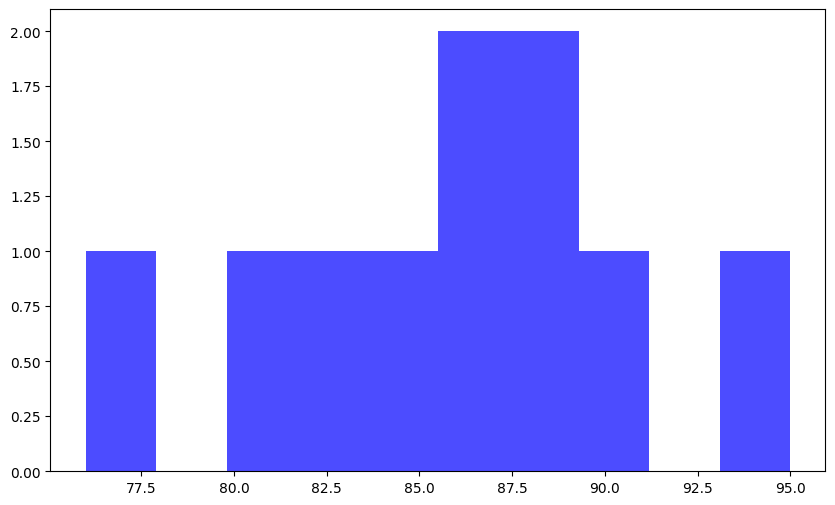

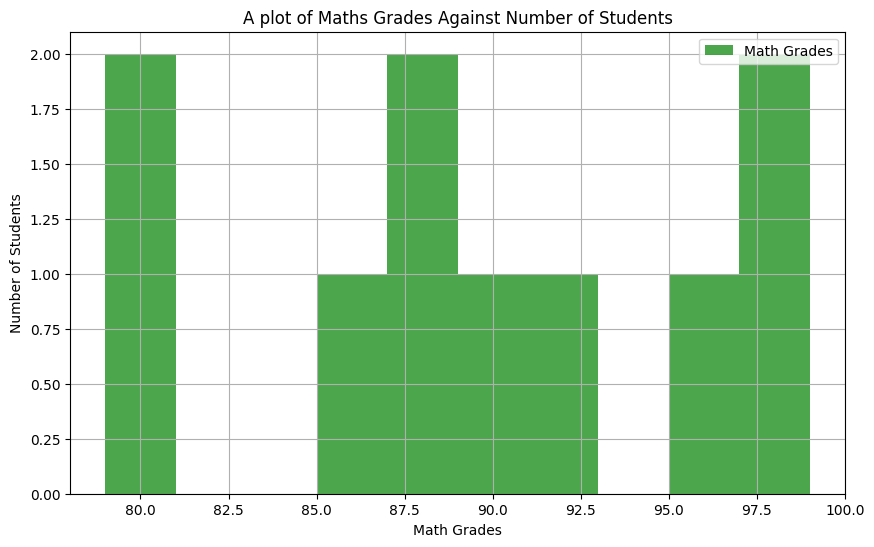

In [123]:
# Let's use matplotlib to display a histogram of the grades distribution
# Histograms are useful for seeing the distribution of the students grades

plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='blue')

# Step 1: Use the line above as reference to create a histogram for the math grades
# (1 mark)
#

plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['mathGrade'], bins=10, alpha=0.7, label='Math Grades', color='green')

# Step 2: Ensure that your plot is descriptive, so use labels (x and y axis), a title, and a legend.
# Hint: Use the matplotlib .legend(loc='<location>') to add and place the legend.
# You can use 'upper left', 'upper right', 'lower left', and 'lower right' to specify the location.
# (4 marks)
#

plt.xlabel("Math Grades")
plt.ylabel("Number of Students")
plt.title("A plot of Maths Grades Against Number of Students")
plt.legend()
plt.grid(True)


# Step 3: Use the .savefig('<image_title>'.png) to output an image file of the histogram.
# Please be sure to use a descriptive title!
# (1 mark)
#


plt.savefig("math_grade_histogram_plot.png")
plt.show()

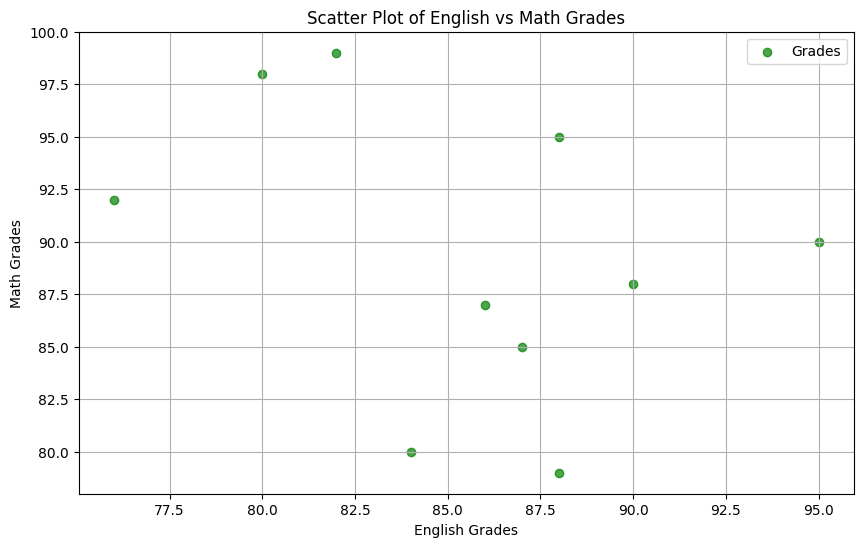

In [124]:
# Let's also use matplotlib to display a scatter plot of English vs. Math grades
# Scatter plots are useful for seeing the relationship between two variables
plt.figure(figsize=(10, 6))

# Step 1: Use .scatter(x_data, y_data) to create a scatter plot using the English grades on the x-axis, and Math grades on the y-axis
# (2 mark)
#
plt.scatter(df_studentGrades['englishGrade'],df_studentGrades["mathGrade"], alpha=0.7, label='Grades', color = 'green')
# Step 1: Properly label the x and y axes as well as the title of your plot.
# (3 marks)
#

plt.title("Scatter Plot of English vs Math Grades")
plt.xlabel("English Grades")
plt.ylabel("Math Grades")
plt.legend()
plt.grid(True)
plt.grid(True)

# Step 2: Output an image file for the scatter plot with a descriptive file name
# (1 mark)
#
plt.savefig("scatter_plot.png")
plt.show()

In [127]:
# From the scatter plot, is there a relationship between the Math and English grades?
# (1 mark)

#No, there's no relationship between a student's grade in English and Math. From the scattered plot,
 #it is evident that there's no correlation between the two grades. A student may have higher grade in
# English and a low grade in Math,while another student may have high grades in both, or low and high
# grades in Math and English respectively. This indicates that there's no correlation between the two grades.

In [119]:
!git add -A
!git commit -m "Part 4: Using Matplotlib for Data Analytics has been  "
!git push origin main